<a href="https://colab.research.google.com/github/parjanyahk/tensorflowCourse/blob/main/Handwriting__Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 99% acccuracy so cancelling training!")
      self.model.stop_training = True      

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   0   

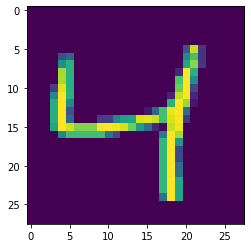

In [5]:
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(x_train[2])
plt.show
print(x_test[2])
print(x_train[2])

In [6]:
x_train, x_test = x_train/300, x_test/300

In [7]:
callbacks = myCallback()

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), #tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3495 - accuracy: 0.9008
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0870 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9834

Reached 99% acccuracy so cancelling training!


In [11]:
model.save('num_reader_model')

INFO:tensorflow:Assets written to: num_reader_model/assets


In [12]:
new_model = tf.keras.models.load_model('num_reader_model')

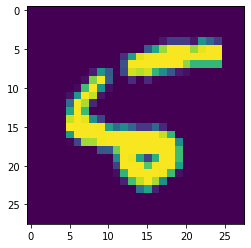

In [13]:
plt.imshow(x_test[8])
plt.show()

In [14]:
pred = new_model.predict([x_test])

In [15]:
print(np.argmax(pred[8]))

5
